Về cơ bản, Tensorflow là một thư viện trên python, hỗ trợ các tính toán tensor (block ma trận) nhanh, phù hợp với các bài toán tính toán ma trận nhiều như deep learning.

Để lập trình toán tensorflow gồm 2 bước:
    1. Lập trình một đồ thị tính toán: trong bước này, chúng ta phải xây dựng một graph (đồ thị) có nhiệm vụ chỉ dẫn các phép toán sẽ lần lượt được chạy như thế nào.
    2. Truyền data vào và tính toán.
    
Ví dụ dưới sẽ hưỡng dẫn lập trình phép tính nhân 2 ma trận 2x2, với 2 ma trận sẽ được truyền vào lúc tính.

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')
path="gdrive/My Drive/DATASCIENCE/THML/"

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


## Bước xây dựng graph

In [3]:
import tensorflow as tf

A_matrix = tf.placeholder(shape=[2,2], dtype=tf.float32)
B_matrix = tf.placeholder(shape=[2,2], dtype=tf.float32)

placeholder là một chỗ chứa để mình truyền data vào trong lúc tính toán.

    shape: chiều của ma trận truyền vào
    
    dtype: kiểu số

In [0]:
result_matrix = tf.matmul(A_matrix, B_matrix)

hàm matmul sẽ tạo một node trong graph, node này có nhiệm vụ nhân 2 ma trận với nhau.

Như vậy là xong bước tạo graph.

## Truyền data vào và tính

In [0]:
session = tf.Session()

Tensorflow sẽ hoạt động theo từng session (phiên làm việc), 
nhiều session có thể dùng cùng một graph để tính toán (mặc định là dùng default graph)

In [0]:
import numpy as np
A = np.array([[1,2],[3,4]])
B = np.array([[5,6],[7,8]])
#Giả sử 2 ma trận A và B bên trên là data ta muốn truyền vào để tính toán


feed_dict = {A_matrix: A, B_matrix: B}
#dòng trên có nhiệm vụ khai báo xem data nào sẽ được truyền vào placeholder nào

In [7]:
C = session.run((result_matrix), feed_dict=feed_dict)
print(C)

[[19. 22.]
 [43. 50.]]


hàm run trên có nhiệm vụ thực hiện tính toán, với feed_dict đã được khai báo ở dòng trước
hàm Session.run(tensor, feed_dict)

    tensor: là node trong graph mình muốn thực hiện tính toán và trả về
    
    feed_dict: kiểu dict, có nhiệm vụ khai báo data nào truyền vào placeholder nào

Tiếp theo, chúng ta sẽ thực nghiệm với  bài toán Linear Regression đã làm ở bài thực hành một với Gradient Descent của Tensorflow.

In [8]:
import pandas as pd
data = pd.read_csv(path+"english_score.csv")
data.head()

,TOEFL Score,GRE Score
0,118,337
1,107,324
2,104,316
3,110,322
4,103,314


In [0]:
X = data["TOEFL Score"].values.reshape(-1,1)
y = data["GRE Score"].values.reshape(-1,1)

In [10]:
#Tạo graph

"""
Ta đang muốn dự đoán y khi đã biết X.

Đầu tiên phải tạo 2 placeholder để chứa X và y.
"""

X_holder = tf.placeholder(shape=[None, 1], dtype=tf.float32)
y_holder = tf.placeholder(shape=[None, 1], dtype=tf.float32)

"""
X_holder có nhiệm vụ nhận điểm TOEFL Score vào graph
y_holder có nhiệm vụ nhận điểm GRE Score đúng, sử dụng như label trong quá trình train

None trong shape thể hiện số dòng của data không xác định trước khi tính toán.
"""

theta_0 = tf.Variable(0.0, dtype=tf.float32)
theta_1 = tf.Variable(0.0, dtype=tf.float32)

"""
Khai báo theta_0 và theta_1 như Variable, tức là các biến này sẽ được thay đổi, được "học" sao cho loss tốt nhất

 tf.Variable(init_value, dtype)
     init_value: giá trị khởi tạo
     dtype: kiểu dữ liệu
"""

y_hat = X_holder*theta_1 + theta_0

"""
y_hat là sẽ y mình dự đoán, các phép tính * và + trên được tính theo từng dòng, y_hat sẽ có shape [None, 1]
"""

loss = tf.square(y_hat - y_holder)
"""
ở dòng trên ta thực hiện tính loss theo từng dòng, phép - là phép tính trên từng dòng,
tf.square sẽ bình phương từng phẩn tử
"""

average_loss = tf.reduce_mean(loss)

"""
dòng trên thực hiện tính loss trung bình trên toàn bộ data, shape của average_loss là [1]

average_loss chính là loss chúng ta cần minimize
"""

train_step = tf.train.AdamOptimizer(learning_rate=0.005).minimize(average_loss)

"""
dòng trên sẽ tạo một node trên graph, node này có nhiệm vụ thực hiện "train", 
tức là sẽ thay đổi theta_0 và theta_1 sao cho minimize được node average_loss.

AdamOptimizer là biến thể của Gradient Descent trong đó learning rate sẽ tự động được điều chỉnh
learning_rate: là tốc độ học khởi tạo theo thuật toán
"""
print()

In [11]:
#chạy

sess = tf.Session()

sess.run(tf.global_variables_initializer())
#khởi tạo tất cả các biến trong graph trong session

for i in range(47000):
    sess.run((train_step), feed_dict={X_holder: X, y_holder: y})
    #Chạy bước training
    
    if i % 100 == 0:
        cur_loss = sess.run((average_loss), feed_dict={X_holder: X, y_holder: y})
        print("Current loss: ", cur_loss)
        #Tính xem loss hiện tạo là bao nhiêu
        
a, b = sess.run((theta_1, theta_0))
print(a,b)
#Do theta_0 và theta_1 không phụ thuộc vào placeholder, nên không cần phải khai bào data truyền vào

Current loss:  99939.19
Current loss:  69526.37
Current loss:  46690.13
Current loss:  30167.951
Current loss:  18678.688
Current loss:  11041.693
Current loss:  6215.9243
Current loss:  3332.3445
Current loss:  1710.78
Current loss:  856.1906
Current loss:  435.60718
Current loss:  242.88438
Current loss:  160.88052
Current loss:  128.55905
Current loss:  116.7883
Current loss:  112.83821
Current loss:  111.619865
Current loss:  111.27424
Current loss:  111.18335
Current loss:  111.15975
Current loss:  111.15222
Current loss:  111.14796
Current loss:  111.144226
Current loss:  111.140396
Current loss:  111.13632
Current loss:  111.13205
Current loss:  111.127525
Current loss:  111.12275
Current loss:  111.117714
Current loss:  111.11242
Current loss:  111.10688
Current loss:  111.101
Current loss:  111.0948
Current loss:  111.08825
Current loss:  111.08135
Current loss:  111.074104
Current loss:  111.0665
Current loss:  111.058464
Current loss:  111.050026
Current loss:  111.04113
Cur

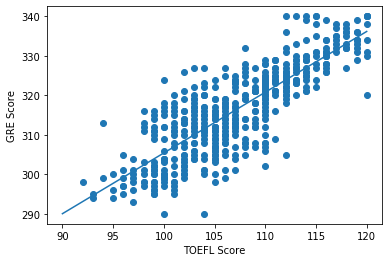

In [12]:
#Vẽ a, b dự đoán được
import matplotlib.pyplot as plt

plt.scatter(X, y)
xx = np.linspace(90, 120)
plt.plot(xx, xx*a+b)
plt.xlabel('TOEFL Score')
plt.ylabel('GRE Score')
plt.show()

# Bài tập

1. Hãy điều chỉnh Learning Rate và số vòng lặp sao cho nó hội tụ nhanh và tốt hơn.

Vẽ kết quả chạy được

---

learning rate: 0,005
số vòng lặp: 47000

2. Hãy chạy node y_hat với data truyền vào là mảng test_X ở dưới để đoán xem nhưng người có điểm TOEFL như phía dưới được bao nhiều điểm GRE





In [13]:
test_X = np.array([[95],[100],[102.5],[110],[117.1]])
for i in range(5):
  test_y =  test_X[i]*a + b
  print(test_y)

[297.72885036]
[305.41547012]
[309.25878]
[320.78870964]
[331.7037097]


3. Như ta đã biết Linear Regression có nghiệm chính xác khi giải bằng đại số là $(X^T*X)^{-1}*X^T*y$

Trong đó:

    $X$: là ma trận data có thêm một cột toàn số 1
    
    $X^T$: là chuyển vị của $X$
    
    $X^{-1}$: là ma trận nghịch đảo của $X$
    
    $y $là vector cột
    
    phép * đều là phép nhân ma trận (không phải nhân từng phẩn tử khi lập trình)

Dùng Tensorflow hãy lập trình để tính theta chỉ bằng các phép toán đại số như trên.

Gợi ý dùng các hàm:

    tf.matmul(A, B): nhân 2 ma trận A và B
    
    tf.pad(X, [[0,0],[0,1], "CONSTANT", constant_values=1.0): thêm một cột toàn số 1 vào X
    
    tf.linalg.inv(X): tìm ma trận nghịch đảo của X
    
    tf.transpose(X): tìm ma trận chuyển vị của X
    
Vẽ kết quả chạy được



In [14]:
#GRE = theta_1*(TOEFL)+theta_0
padding = tf.constant([[0,0],[0,1]])
Xbar = tf.pad(X, padding, "CONSTANT", constant_values=1)
_A = tf.matmul(tf.transpose(Xbar), Xbar)
_b = tf.matmul(tf.transpose(Xbar), y)

A = tf.cast(_A, tf.float64)
b = tf.cast(_b, tf.float64)


A_T=tf.linalg.inv(A)
theta = tf.matmul(A_T, b)

sess = tf.Session()
print(sess.run(theta))


[[  1.5362635 ]
 [151.79684301]]
